In [1]:
# Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical
# mettle.) This step may require some research. Feel free to use the following code to get started. Be sure to make any necessary modifications
# for your username, password, host, port, and database name:
import psycopg2
import pandas as pd
import pandas.io.sql as psql
import config
from sqlalchemy import create_engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(config.username, config.password, 'localhost', 5432, 'employeedb'))
connection = engine.connect()

In [3]:
# Read the database into a Pandas DataFrame.
employees_df = pd.read_sql_query("Select sal.salary from employees emp,salaries sal where emp.emp_no=sal.emp_no ", connection)
employees_df

,salary
0,48973
1,40000
2,43548
3,63377
4,40000
...,...
300019,40000
300020,40000
300021,59703
300022,48038


<AxesSubplot:title={'center':'Most common salary ranges for employees'}, ylabel='Frequency'>

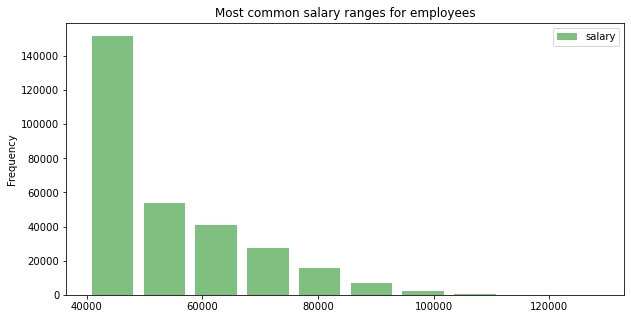

In [30]:
# Create a histogram to visualize the most common salary ranges for employees
employees_df.plot(kind='hist', figsize=(10,5), legend=True, color='green', alpha=0.5, rwidth=0.8, title = 'Most common salary ranges for employees')




In [15]:
# Create a bar chart of average salary by title.
avg_salary_by_title_df = pd.read_sql_query("Select title, avg(sal.salary) as avgsal from employees emp,salaries sal,titles where emp.emp_no=sal.emp_no and emp.emp_title_id =titles.title_id group by title", connection)
avg_salary_by_title_df


,title,avgsal
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


<AxesSubplot:title={'center':'Average salary by title'}, xlabel='title'>

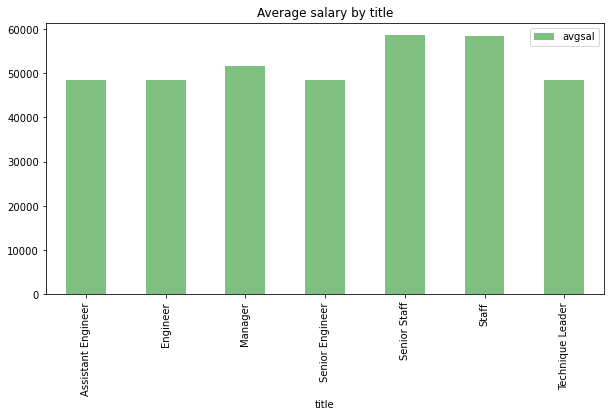

In [34]:
# Create a bar chart of average salary by title.
avg_salary_by_title_df.plot(kind='bar', x='title', y='avgsal', figsize=(10,5), legend=True, color='green', alpha=0.5, title = 'Average salary by title')

